In [1]:
!pip install tensorflow opencv-python matplotlib


In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [3]:
import tensorflow as tf
import os

In [4]:

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [252]:
data_dir='data'

In [253]:
os.listdir(data_dir)

['Beauty', 'fashion', 'home', 'nutrients']

In [254]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [255]:
img=cv2.imread(os.path.join('data','nutrients','n1.jpg'))

In [256]:
img.shape

(1280, 948, 3)

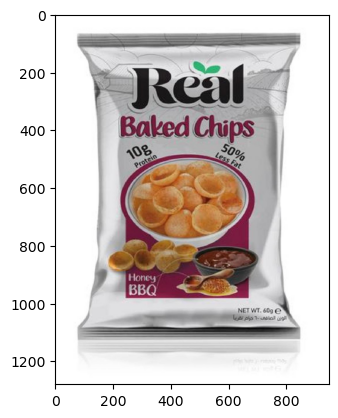

In [257]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [258]:
import numpy as np
from matplotlib import pyplot as plt

In [265]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 111 files belonging to 4 classes.


In [266]:
data_iterator = data.as_numpy_iterator()

In [271]:
batch = data_iterator.next()

In [272]:
batch[0].shape

(32, 256, 256, 3)

In [273]:
batch[1]

array([1, 3, 0, 0, 2, 3, 1, 1, 2, 2, 3, 3, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0,
       3, 2, 1, 0, 2, 1, 2, 0, 2, 0])

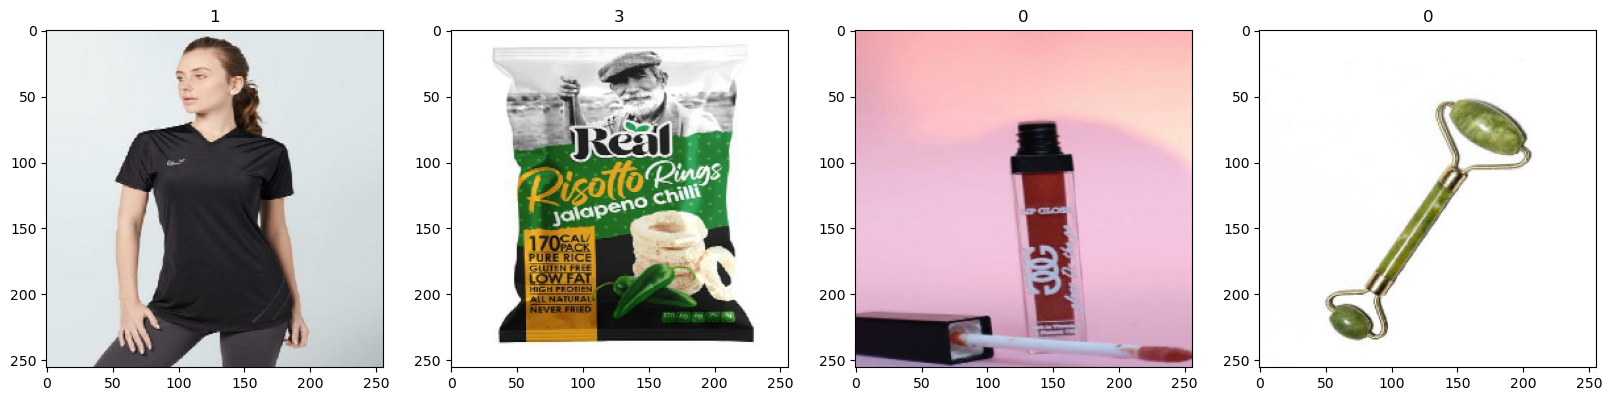

In [275]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    #0>>>beauty 1>>>fashion 2>>>home 3>>>nutrition

In [276]:
data = data.map(lambda x,y: (x/255, y))

In [277]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [278]:
data.as_numpy_iterator().next()[0].max()

1.0

In [279]:
len(data)

4

In [280]:
train_size = int(len(data_dir)*.7)
val_size = int(len(data_dir)*.2)+1
test_size = int(len(data_dir)*.1)+1

In [281]:
test_size

1

In [282]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [283]:
len(val)

1

In [284]:
train = train.map(lambda x, y: (x, tf.one_hot(y, depth=4)))  # Apply one-hot encoding to the target labels.
val = val.map(lambda x, y: (x, tf.one_hot(y, depth=4)))  # Apply one-hot encoding to the target labels.
test = test.map(lambda x, y: (x, tf.one_hot(y, depth=4)))  # Apply one-hot encoding to the target labels.

In [285]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [286]:
model = Sequential()

In [287]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [288]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [289]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 16)       

In [290]:
logdir='logs1'

In [291]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [292]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 6s 3s/step - loss: 2.0674 - accuracy: 0.2500 - val_loss: 1.4533 - val_accuracy: 0.3750
Epoch 2/20
2/2 [==============================] - 4s 2s/step - loss: 1.6507 - accuracy: 0.2188 - val_loss: 1.2471 - val_accuracy: 0.3125
Epoch 3/20
2/2 [==============================] - 3s 2s/step - loss: 1.2131 - accuracy: 0.3438 - val_loss: 1.1633 - val_accuracy: 0.5312
Epoch 4/20
2/2 [==============================] - 3s 2s/step - loss: 1.1322 - accuracy: 0.5625 - val_loss: 0.9393 - val_accuracy: 0.6875
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 1.0006 - accuracy: 0.6719 - val_loss: 0.8585 - val_accuracy: 0.7500
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 0.7734 - accuracy: 0.8125 - val_loss: 0.8436 - val_accuracy: 0.5938
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.7576 - accuracy: 0.7031 - val_loss: 0.6183 - val_accuracy: 0.7812
Epoch 8/20
2/2 [=========================

In [293]:
hist.history

{'loss': [2.0673553943634033,
  1.6507179737091064,
  1.213102102279663,
  1.132216453552246,
  1.000629186630249,
  0.7734017372131348,
  0.7576117515563965,
  0.6541135907173157,
  0.4790042042732239,
  0.3753099739551544,
  0.2549673914909363,
  0.2179909348487854,
  0.2162388265132904,
  0.18344908952713013,
  0.11808138340711594,
  0.06885499507188797,
  0.07108981907367706,
  0.05554158240556717,
  0.03099760040640831,
  0.027876917272806168],
 'accuracy': [0.25,
  0.21875,
  0.34375,
  0.5625,
  0.671875,
  0.8125,
  0.703125,
  0.8125,
  0.78125,
  0.921875,
  0.921875,
  0.984375,
  0.9375,
  0.9375,
  0.96875,
  1.0,
  0.984375,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.4532829523086548,
  1.247136116027832,
  1.163312315940857,
  0.9392522573471069,
  0.8584951162338257,
  0.8436077237129211,
  0.6183445453643799,
  0.34055423736572266,
  0.30347368121147156,
  0.300193190574646,
  0.19745714962482452,
  0.23227117955684662,
  0.12666693329811096,
  0.08506564795970917,
  0.0707

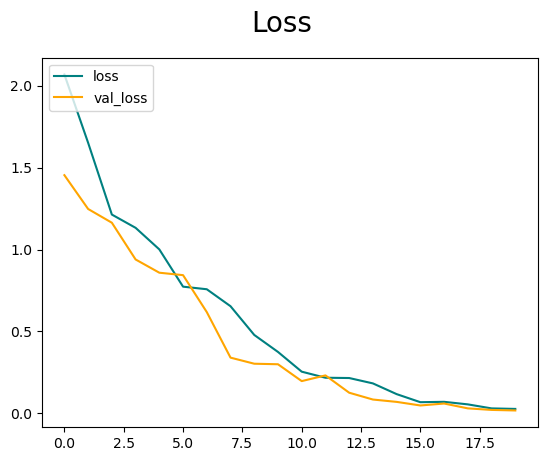

In [294]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

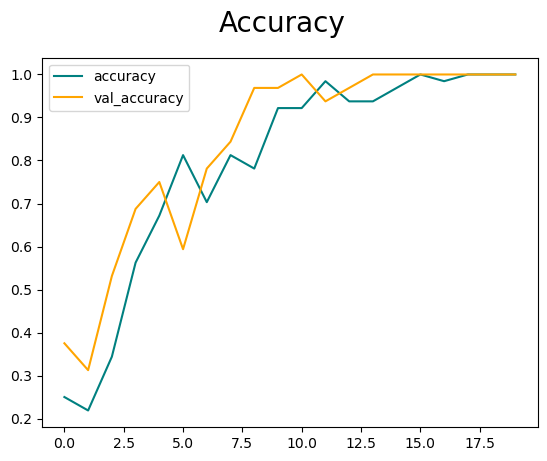

In [295]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [296]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [297]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [479]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 488ms/step


In [480]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


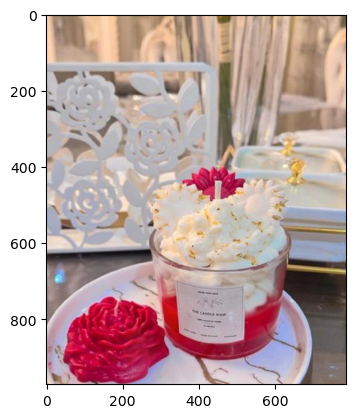

In [629]:
img = cv2.imread('htest4.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

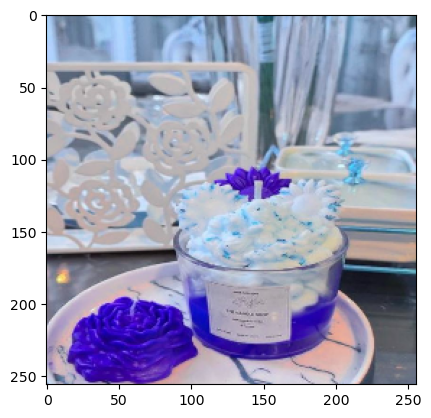

In [630]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [631]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 101ms/step


In [632]:
yhat

array([[1.12397775e-01, 1.92528069e-01, 6.95073903e-01, 2.87936217e-07]],
      dtype=float32)

In [633]:
predicted_class = np.argmax(yhat)  # Get the index of the class with the highest probability.
predicted_class

2

In [634]:
if predicted_class == 0:
    print('Predicted class is beauty')
elif predicted_class == 1:
    print('Predicted class is fashion')
elif predicted_class == 2:
    print('Predicted class is home')
elif predicted_class == 3:
    print('Predicted class is nutrition')

Predicted class is home
